## Dendogram 
cluster companies via their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day) from `2010` to `2015` obtained from *Yahoo! Finance*, where each row corresponds to a company, and each column corresponds to a trading day. Some stocks are more expensive than others. To account for this, include a `Normalizer` at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.
`dendrogram` spans over the different number of cluster.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import os

from pathlib               import Path

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


### Load dataset

In [9]:
path_dataset = path_root / 'dataset/company-stock-movements-2010-2015-incl.csv'
data      = pd.read_csv(path_dataset, index_col = 0) 
movements = data.values
companies = data.index
data.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


### Visualize cluster

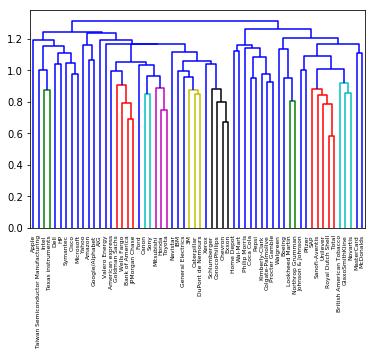

In [10]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')
# Plot the dendrogram
dendrogram(mergings, labels = companies, leaf_rotation = 90., leaf_font_size = 6)
plt.show()